# **Exploratory Data Analysis**

This may be similar to data cleaning and pre-processing. It can be performed to understand what cleaning strategies is required. But it can also be performed to get a *preliminary* understanding of the data, the correlation between features, and the distribution of the data. The findings for these can be used to
- identify the features that are important for the model
- determine the need for feature engineering (or not)
- understand the distribution of the data and the need for normalization or standardization
- identify the need for **data augmentation** (or not)
- direct the choice of appropriate ML algorithms to create the model
- guid the choice of hyperparameters for the model and the training process

> For a dataset-specific but **detailed** example of EDA, study a Kaggle Notebook I've created before: https://www.kaggle.com/code/hquizzagan/1-basic-ml-classification-eda#2.-Basic-EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./nyc-taxi-trip-duration/train.csv')
df.shape

(1458644, 11)

In [3]:
# Randomly sample 5 records from the dataset for INITIAL INSPECTION
df.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
938422,id1734170,2,2016-04-30 20:05:35,2016-04-30 20:17:23,1,-73.963684,40.771137,-73.956985,40.786255,N,708
579757,id2230160,1,2016-03-05 02:40:05,2016-03-05 02:47:51,1,-73.988930,40.731495,-74.007652,40.725674,N,466
1345620,id2681437,1,2016-06-05 11:19:17,2016-06-05 11:36:41,1,-73.964828,40.760265,-74.004326,40.722820,N,1044
592052,id1415881,2,2016-03-02 15:08:38,2016-03-02 15:18:10,2,-74.002617,40.723293,-73.991753,40.744255,N,572
622674,id2040688,2,2016-03-31 14:52:30,2016-03-31 15:03:33,4,-74.002419,40.755939,-73.988098,40.750019,N,663


In [4]:
# Use the df.describe() function to get the SUMMARY STATISTICS table for the NUMERICAL COLUMNS specifically
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [5]:
# With the df.info(), you can summarize the dataframe in another way
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
# Check for missing values if any
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
# Check the data types of the available feature variables
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

There seems to be a **categorical** feature in the data, namely, `store_and_fwd_flag`. Let's see what values it takes.

In [8]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Let's check the **distribution** of this categorical variable.

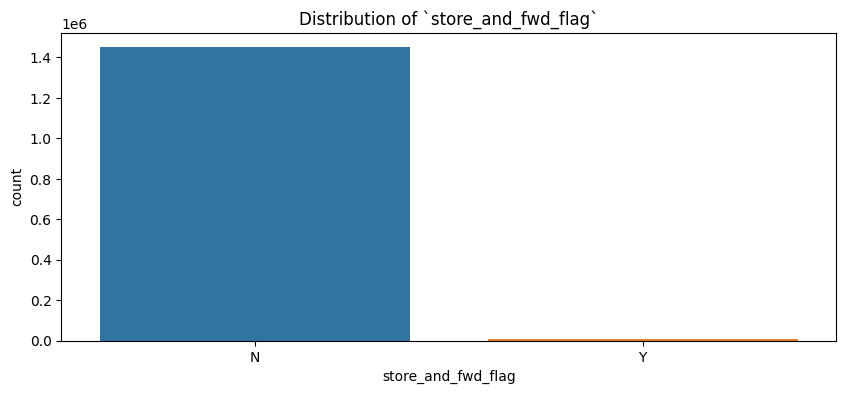

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram of the categorical variable/s
plt.figure(figsize=(10,4))
sns.countplot(x='store_and_fwd_flag', data=df)
plt.title(f'Distribution of `store_and_fwd_flag`')
plt.show()

This shows an **imbalanced dataset**. There are very few instances of `Y` compared to `N`. This may be a problem for the model. We will see how to deal with this later. Or we can deal it with it now by **oversampling** the minority class.

## **Just Make it Dirty**

To demonstrate using the distribution of categorical variables to determine the need for feature engineering, let's look at the artificially dirtified dataset we created before

In [ ]:
df_dirty = pd.read_csv('./nyc-taxi-trip-duration/train_dirty.csv')
df_dirty.shape

In [ ]:
df_dirty.dtypes

In [ ]:
# Extract the categorical variables
cat_cols = ['store_and_fwd_flag', 'nyc_borough', 'taxi_type', 'payment_type']

In [ ]:
# Plot the histogram of the categorical variable/s
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df_dirty)
    plt.title(f'Distribution of `{col}`')
    plt.show()

You can also choose to visualize **all the features' distribution** and not just the *categorical variables*:

In [ ]:
# Sample only for demo purposes
df_dirty_sample = df_dirty.sample(10_000)

# Visualize the distribution of each feature
df_dirty_sample.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

## **Back to Our Real Competition Dataset**

In [10]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
# Use binary encoding to convert the categorical variable to numeric
# df['store_and_fwd_flag'] = np.where(df['store_and_fwd_flag'] == 'N', 0, 1)

# Alternatively, using LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['store_and_fwd_flag'] = le.fit_transform(df['store_and_fwd_flag'])
df['store_and_fwd_flag'].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [12]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


How do we deal with the **class imbalance** of the categorical variable?

Normally, **as long as that variable IS NOT the target variable**, we can just ignore it and choose a right algorithm to deal with it. But in this case, the categorical variable is the target variable, we need to perform **data augmentation** by **oversampling** the minority class. For the meantime, let's just ignore it and come back to it when we want to improve the model.

<Axes: >

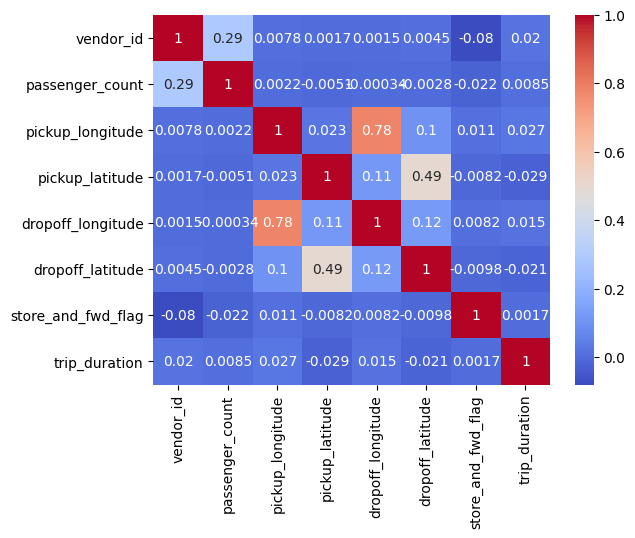

In [13]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [20]:
# Re-calculate the correlation matrix using data excluding vendor_id
corr_matrix = df.drop('vendor_id', axis=1).corr()

# Rank the pairs with the highest to lowest correlation coefficient
corr_df = corr_matrix.unstack().reset_index()
corr_df.columns = ['feature_1', 'feature_2', 'correlation']

# Remove self-correlations by filtering out rows where Variable 1 and Variable 2 are the same
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]

# Compute absolute correlation for sorting
corr_df['Abs Correlation'] = corr_df['correlation'].abs()

# Remove the correlations of the same pair of feature_1 and feature_2 by dropping if exact duplicate 'Abs Correlation' column
corr_df.drop_duplicates(subset=['correlation'], inplace=True)

corr_df.sort_values('Abs Correlation', ascending=False, inplace=True)
corr_df.head(10)

,feature_1,feature_2,correlation,Abs Correlation
10,pickup_longitude,dropoff_longitude,0.783582,0.783582
18,pickup_latitude,dropoff_latitude,0.494038,0.494038
25,dropoff_longitude,dropoff_latitude,0.124873,0.124873
17,pickup_latitude,dropoff_longitude,0.114884,0.114884
11,pickup_longitude,dropoff_latitude,0.100190,0.100190
20,pickup_latitude,trip_duration,-0.029204,0.029204
13,pickup_longitude,trip_duration,0.026542,0.026542
9,pickup_longitude,pickup_latitude,0.022568,0.022568
5,passenger_count,store_and_fwd_flag,-0.021815,0.021815
34,dropoff_latitude,trip_duration,-0.020677,0.020677


In [21]:
corr_df

,feature_1,feature_2,correlation,Abs Correlation
10,pickup_longitude,dropoff_longitude,0.783582,0.783582
18,pickup_latitude,dropoff_latitude,0.494038,0.494038
25,dropoff_longitude,dropoff_latitude,0.124873,0.124873
17,pickup_latitude,dropoff_longitude,0.114884,0.114884
11,pickup_longitude,dropoff_latitude,0.100190,0.100190
20,pickup_latitude,trip_duration,-0.029204,0.029204
13,pickup_longitude,trip_duration,0.026542,0.026542
9,pickup_longitude,pickup_latitude,0.022568,0.022568
5,passenger_count,store_and_fwd_flag,-0.021815,0.021815
34,dropoff_latitude,trip_duration,-0.020677,0.020677


Based on the above, we can deduce that
1. All the feature variables seem to have **weak direct correlations** to our `target_variable` called `trip_duration` since the *correlation coefficient* are all less than`0.1`.
2. Amongst the feature variables, there are no *interpretable* pairs of feature variables that exhibit *strong correlations* with each other => no possibility of feature redundancy
3

# **Extension of EDA**

## **Bivariate Analysis**

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(data=df, vars=df.columns)
plt.show()

In [ ]:
numerical_variables = ['passenger_count', 'trip_duration', 'store_and_fwd_flag']
# Boxplot for numerical variables to check for outliers
for var in numerical_variables:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=var, data=df)
    plt.title(f'Boxplot of {var}')
    plt.show()